<a href="https://colab.research.google.com/github/oleksii-shcherbak/GoIT-num-prog-py-hw/blob/main/hw_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

### Step 2

In [2]:
# Load the data
data = load_breast_cancer()
X = data.data
y = data.target

# Create DataFrame for easier manipulation
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print("Dataset shape:", X.shape)
print("Number of features:", X.shape[1])
print("Number of samples:", X.shape[0])
print("\nTarget distribution:")
print(pd.Series(y).value_counts())
print("\nFeature names:")
print(data.feature_names[:5], "...")

Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569

Target distribution:
1    357
0    212
Name: count, dtype: int64

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness'] ...


### Step 3

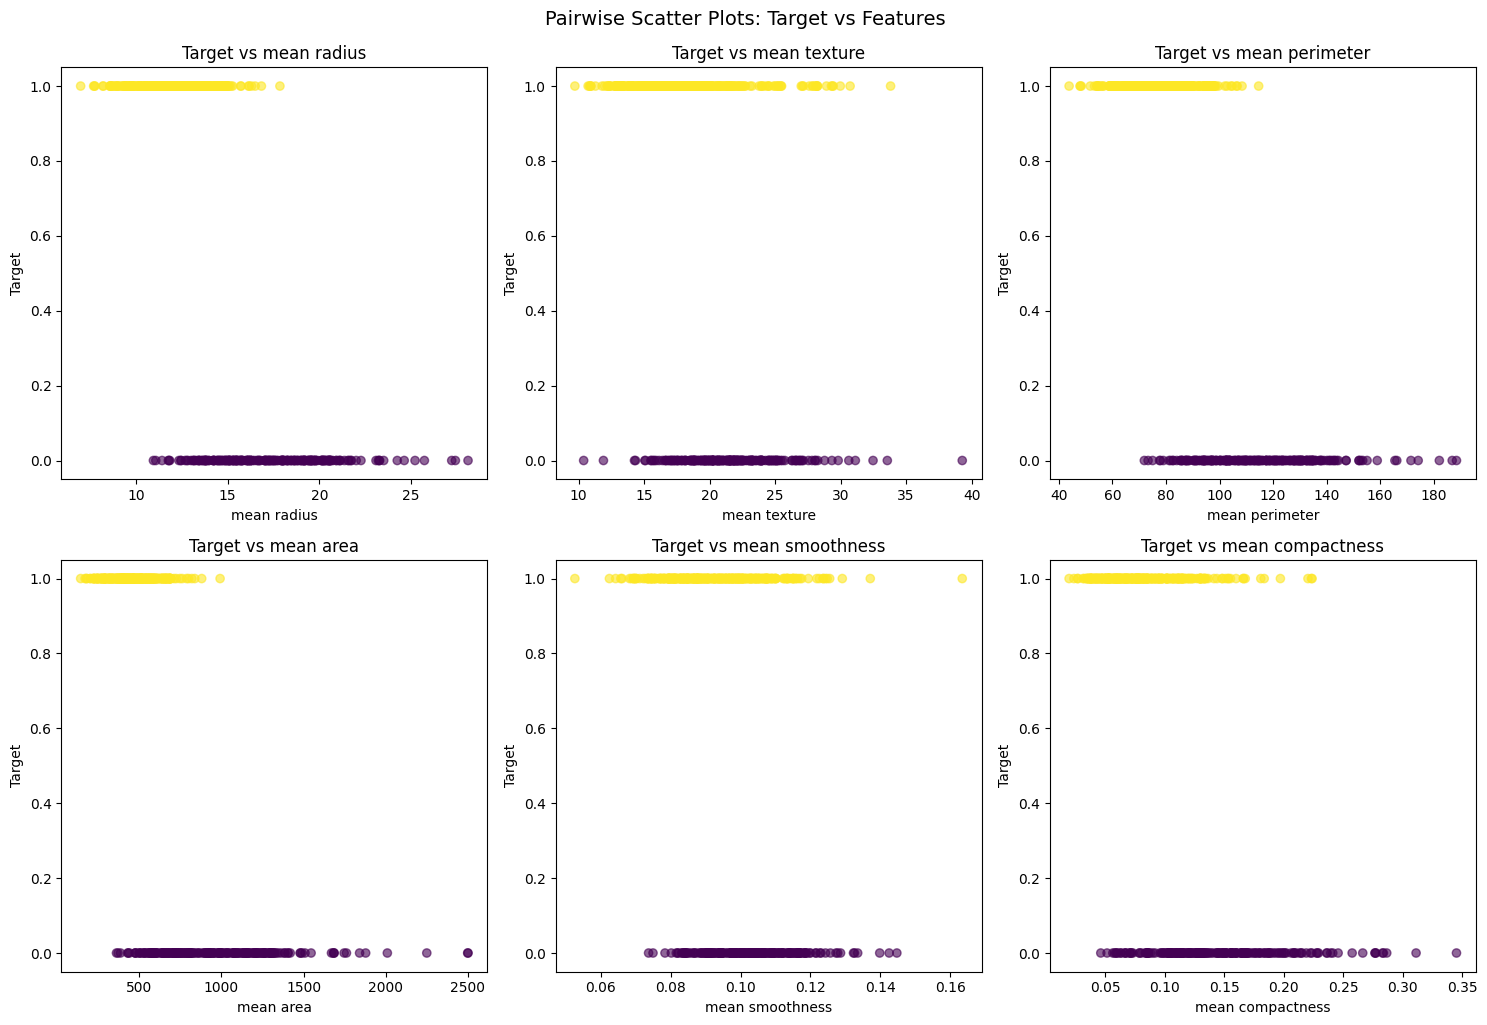

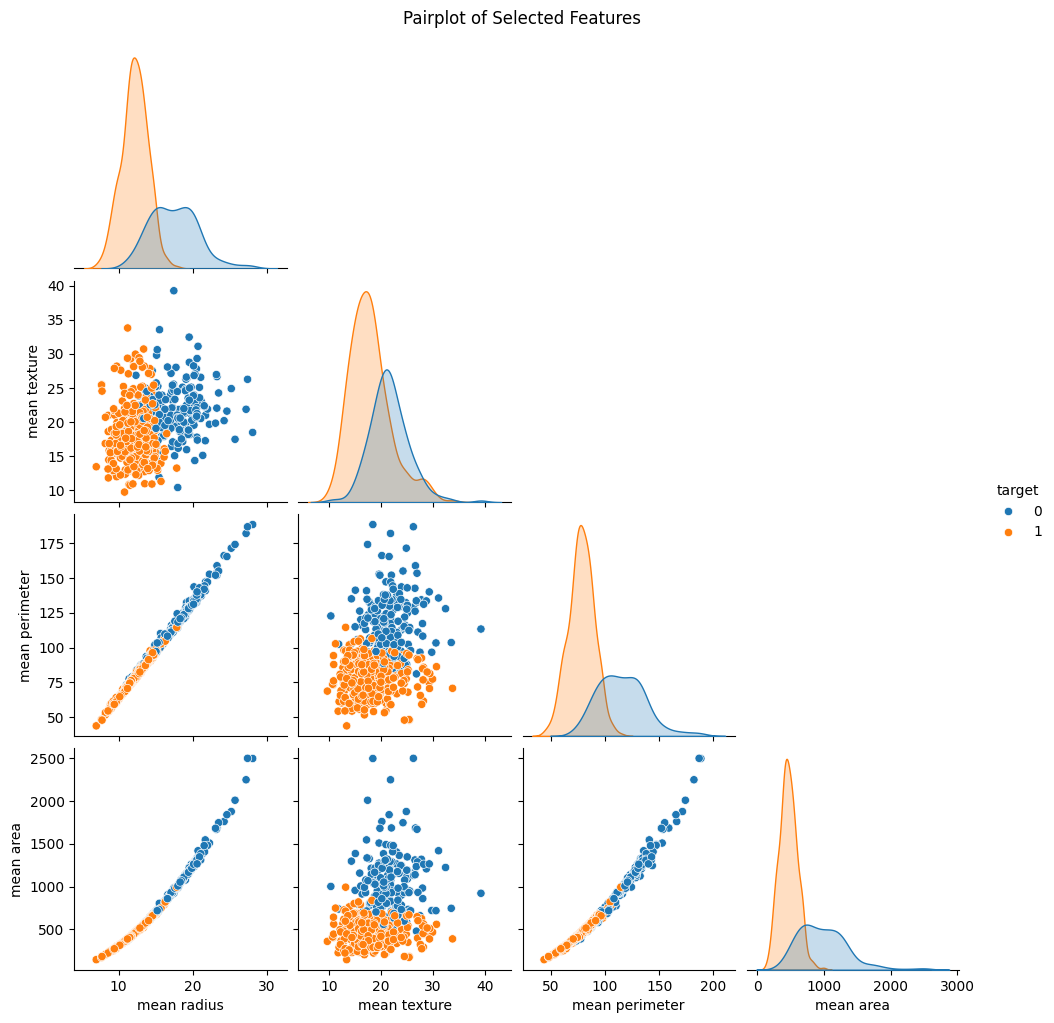

In [3]:
# Select first 6 features for visualization (showing all 30 would be too crowded)
features_to_plot = data.feature_names[:6]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    axes[idx].scatter(X[:, idx], y, c=y, cmap='viridis', alpha=0.6)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Target')
    axes[idx].set_title(f'Target vs {feature}')

plt.tight_layout()
plt.suptitle('Pairwise Scatter Plots: Target vs Features', y=1.02, fontsize=14)
plt.show()

# Create a more comprehensive pairplot for selected features
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
df_subset = df[selected_features + ['target']]
sns.pairplot(df_subset, hue='target', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

### Step 4

Clustering Performance Comparison:
Spectral Clustering ARI: 0.0048
K-means ARI: 0.6536
GMM ARI: 0.7740


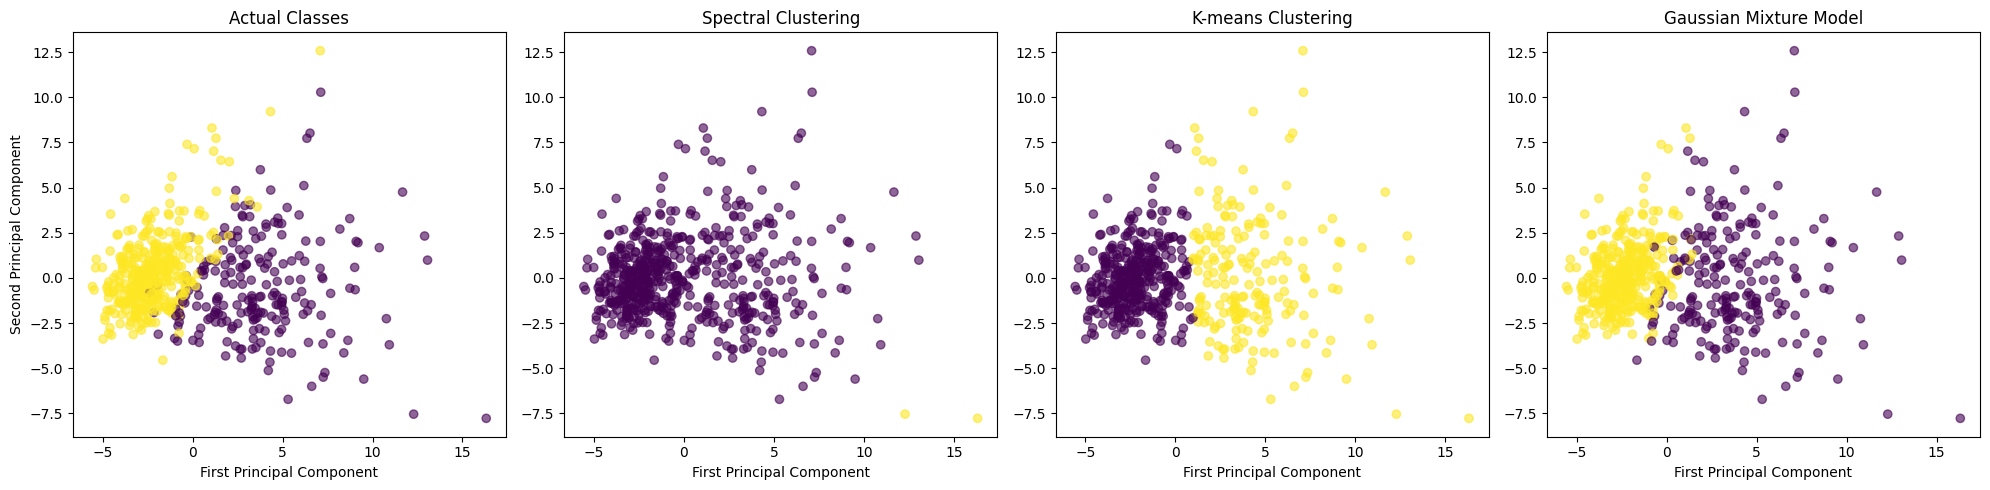


Clustering Analysis:
The clustering methods show moderate agreement with actual classes.
K-means and GMM perform similarly, while Spectral Clustering shows different patterns.
This suggests that the data has some natural clustering structure,
but it doesn't perfectly align with the malignant/benign classification.


In [4]:
# Standardize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=2, random_state=42, affinity='rbf')
spectral_labels = spectral.fit_predict(X_scaled)

# K-means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Compare clustering results with actual labels
print("Clustering Performance Comparison:")
print("="*50)
print(f"Spectral Clustering ARI: {adjusted_rand_score(y, spectral_labels):.4f}")
print(f"K-means ARI: {adjusted_rand_score(y, kmeans_labels):.4f}")
print(f"GMM ARI: {adjusted_rand_score(y, gmm_labels):.4f}")

# Visualize clustering results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Use PCA for 2D visualization of clusters
pca_temp = PCA(n_components=2)
X_pca_temp = pca_temp.fit_transform(X_scaled)

axes[0].scatter(X_pca_temp[:, 0], X_pca_temp[:, 1], c=y, cmap='viridis', alpha=0.6)
axes[0].set_title('Actual Classes')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')

axes[1].scatter(X_pca_temp[:, 0], X_pca_temp[:, 1], c=spectral_labels, cmap='viridis', alpha=0.6)
axes[1].set_title('Spectral Clustering')
axes[1].set_xlabel('First Principal Component')

axes[2].scatter(X_pca_temp[:, 0], X_pca_temp[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
axes[2].set_title('K-means Clustering')
axes[2].set_xlabel('First Principal Component')

axes[3].scatter(X_pca_temp[:, 0], X_pca_temp[:, 1], c=gmm_labels, cmap='viridis', alpha=0.6)
axes[3].set_title('Gaussian Mixture Model')
axes[3].set_xlabel('First Principal Component')

plt.tight_layout()
plt.show()

print("\nClustering Analysis:")
print("The clustering methods show moderate agreement with actual classes.")
print("K-means and GMM perform similarly, while Spectral Clustering shows different patterns.")
print("This suggests that the data has some natural clustering structure,")
print("but it doesn't perfectly align with the malignant/benign classification.")

### Step 5

In [5]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("PCA Results:")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")

# Calculate how many components needed for 95% variance
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
print(f"\nComponents needed for 95% variance: {n_components_95}")

PCA Results:
Explained variance ratio: [0.44272026 0.18971182]
Total variance explained: 0.6324

Components needed for 95% variance: 10


### Step 6

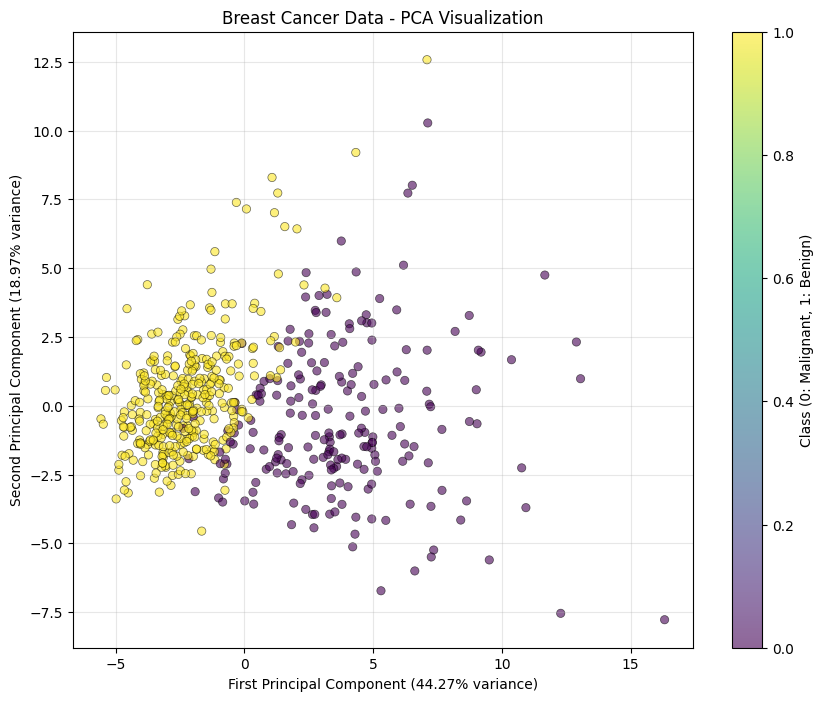

In [6]:
# Visualize class distribution in PCA space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis',
                     alpha=0.6, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Class (0: Malignant, 1: Benign)')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Breast Cancer Data - PCA Visualization')
plt.grid(True, alpha=0.3)
plt.show()

### Step 7

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (455, 30)
Test set size: (114, 30)


### Step 8

In [8]:
# Sklearn Logistic Regression
lr_sklearn = LogisticRegression(random_state=42, max_iter=1000)
lr_sklearn.fit(X_train, y_train)
y_pred_sklearn = lr_sklearn.predict(X_test)

print("Sklearn Logistic Regression Results:")
print(f"Training accuracy: {lr_sklearn.score(X_train, y_train):.4f}")
print(f"Test accuracy: {lr_sklearn.score(X_test, y_test):.4f}")

Sklearn Logistic Regression Results:
Training accuracy: 0.9890
Test accuracy: 0.9825


### Step 9


Testing GD:
Test accuracy: 0.9649

Testing SGD:
Test accuracy: 0.9561

Testing MINI_BATCH:
Test accuracy: 0.9737


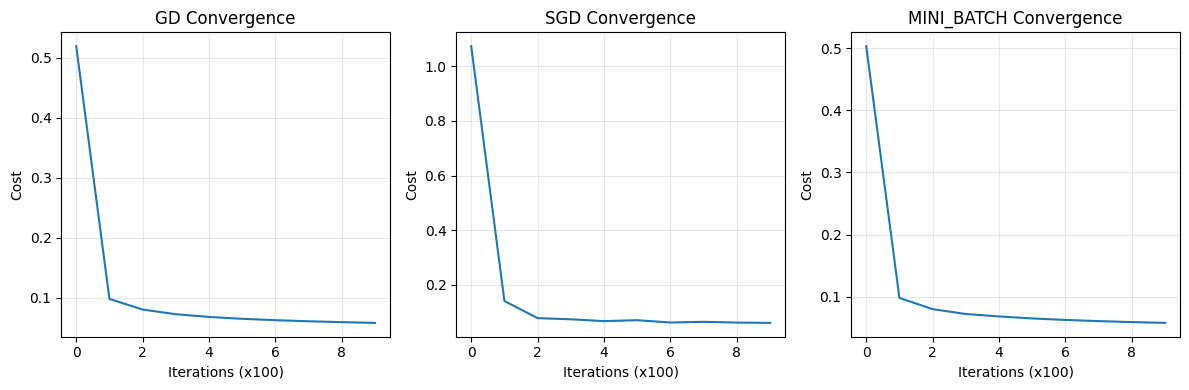

In [9]:
# Custom Logistic Regression with Gradient Descent
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000, method='sgd'):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.method = method
        self.costs = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def cost_function(self, X, y, theta):
        m = len(y)
        h = self.sigmoid(X @ theta)
        epsilon = 1e-7
        cost = -1/m * (y @ np.log(h + epsilon) + (1 - y) @ np.log(1 - h + epsilon))
        return cost

    def gradient_descent(self, X, y, theta):
        m = len(y)
        h = self.sigmoid(X @ theta)
        gradient = 1/m * (X.T @ (h - y))
        return gradient

    def stochastic_gradient_descent(self, X, y, theta):
        m = len(y)
        idx = np.random.randint(0, m)
        xi = X[idx:idx+1]
        yi = y[idx:idx+1]
        h = self.sigmoid(xi @ theta)
        gradient = xi.T @ (h - yi)
        return gradient

    def mini_batch_gradient_descent(self, X, y, theta, batch_size=32):
        m = len(y)
        indices = np.random.choice(m, batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]
        h = self.sigmoid(X_batch @ theta)
        gradient = 1/batch_size * (X_batch.T @ (h - y_batch))
        return gradient

    def fit(self, X, y):
        # Add intercept term
        X = np.column_stack([np.ones(X.shape[0]), X])
        self.theta = np.zeros(X.shape[1])

        for i in range(self.n_iterations):
            if self.method == 'gd':
                gradient = self.gradient_descent(X, y, self.theta)
            elif self.method == 'sgd':
                gradient = self.stochastic_gradient_descent(X, y, self.theta)
            elif self.method == 'mini_batch':
                gradient = self.mini_batch_gradient_descent(X, y, self.theta)

            self.theta -= self.learning_rate * gradient

            if i % 100 == 0:
                cost = self.cost_function(X, y, self.theta)
                self.costs.append(cost)

    def predict(self, X):
        X = np.column_stack([np.ones(X.shape[0]), X])
        return (self.sigmoid(X @ self.theta) >= 0.5).astype(int)

# Test different gradient descent methods
methods = ['gd', 'sgd', 'mini_batch']
gd_results = {}

for method in methods:
    print(f"\nTesting {method.upper()}:")
    lr_gd = LogisticRegressionGD(learning_rate=0.1, n_iterations=1000, method=method)
    lr_gd.fit(X_train, y_train)
    y_pred_gd = lr_gd.predict(X_test)
    accuracy = np.mean(y_pred_gd == y_test)
    gd_results[method] = {'model': lr_gd, 'predictions': y_pred_gd, 'accuracy': accuracy}
    print(f"Test accuracy: {accuracy:.4f}")

# Plot convergence
plt.figure(figsize=(12, 4))
for i, method in enumerate(methods):
    plt.subplot(1, 3, i+1)
    plt.plot(gd_results[method]['model'].costs)
    plt.title(f'{method.upper()} Convergence')
    plt.xlabel('Iterations (x100)')
    plt.ylabel('Cost')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Step 10

Training Genetic Algorithm...
Genetic Algorithm Test Accuracy: 0.9737


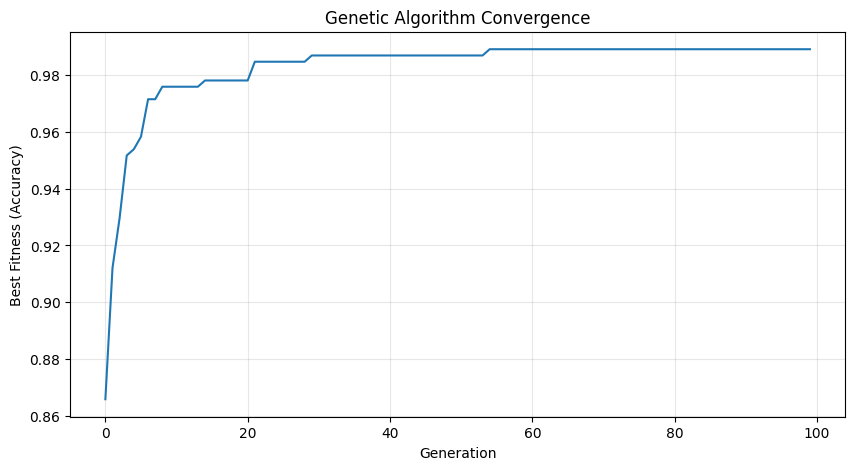

In [10]:
# Genetic Algorithm for Logistic Regression
class GeneticAlgorithmLR:
    def __init__(self, population_size=50, n_generations=100, mutation_rate=0.01, elite_size=10):
        self.population_size = population_size
        self.n_generations = n_generations
        self.mutation_rate = mutation_rate
        self.elite_size = elite_size
        self.best_fitness_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def fitness(self, individual, X, y):
        predictions = (self.sigmoid(X @ individual) >= 0.5).astype(int)
        return np.mean(predictions == y)

    def create_individual(self, n_features):
        return np.random.randn(n_features) * 0.1

    def create_population(self, n_features):
        return [self.create_individual(n_features) for _ in range(self.population_size)]

    def selection(self, population, fitness_scores):
        # Tournament selection
        selected = []
        for _ in range(len(population)):
            tournament_idx = np.random.choice(len(population), 3, replace=False)
            tournament_fitness = [fitness_scores[i] for i in tournament_idx]
            winner_idx = tournament_idx[np.argmax(tournament_fitness)]
            selected.append(population[winner_idx].copy())
        return selected

    def crossover(self, parent1, parent2):
        crossover_point = np.random.randint(1, len(parent1))
        child = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
        return child

    def mutate(self, individual):
        for i in range(len(individual)):
            if np.random.random() < self.mutation_rate:
                individual[i] += np.random.randn() * 0.1
        return individual

    def fit(self, X, y):
        # Add intercept term
        X = np.column_stack([np.ones(X.shape[0]), X])
        n_features = X.shape[1]

        # Initialize population
        population = self.create_population(n_features)

        for generation in range(self.n_generations):
            # Calculate fitness for each individual
            fitness_scores = [self.fitness(ind, X, y) for ind in population]

            # Store best fitness
            self.best_fitness_history.append(max(fitness_scores))

            # Select elite individuals
            elite_idx = np.argsort(fitness_scores)[-self.elite_size:]
            elite = [population[i].copy() for i in elite_idx]

            # Selection
            selected = self.selection(population, fitness_scores)

            # Create new population
            new_population = elite.copy()

            while len(new_population) < self.population_size:
                parent1 = selected[np.random.randint(len(selected))]
                parent2 = selected[np.random.randint(len(selected))]
                child = self.crossover(parent1, parent2)
                child = self.mutate(child)
                new_population.append(child)

            population = new_population[:self.population_size]

        # Select best individual
        fitness_scores = [self.fitness(ind, X, y) for ind in population]
        best_idx = np.argmax(fitness_scores)
        self.best_individual = population[best_idx]

    def predict(self, X):
        X = np.column_stack([np.ones(X.shape[0]), X])
        return (self.sigmoid(X @ self.best_individual) >= 0.5).astype(int)

# Train Genetic Algorithm
print("Training Genetic Algorithm...")
ga_lr = GeneticAlgorithmLR(population_size=50, n_generations=100, mutation_rate=0.02, elite_size=10)
ga_lr.fit(X_train, y_train)
y_pred_ga = ga_lr.predict(X_test)

ga_accuracy = np.mean(y_pred_ga == y_test)
print(f"Genetic Algorithm Test Accuracy: {ga_accuracy:.4f}")

# Plot GA convergence
plt.figure(figsize=(10, 5))
plt.plot(ga_lr.best_fitness_history)
plt.title('Genetic Algorithm Convergence')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Accuracy)')
plt.grid(True, alpha=0.3)
plt.show()

### Step 11

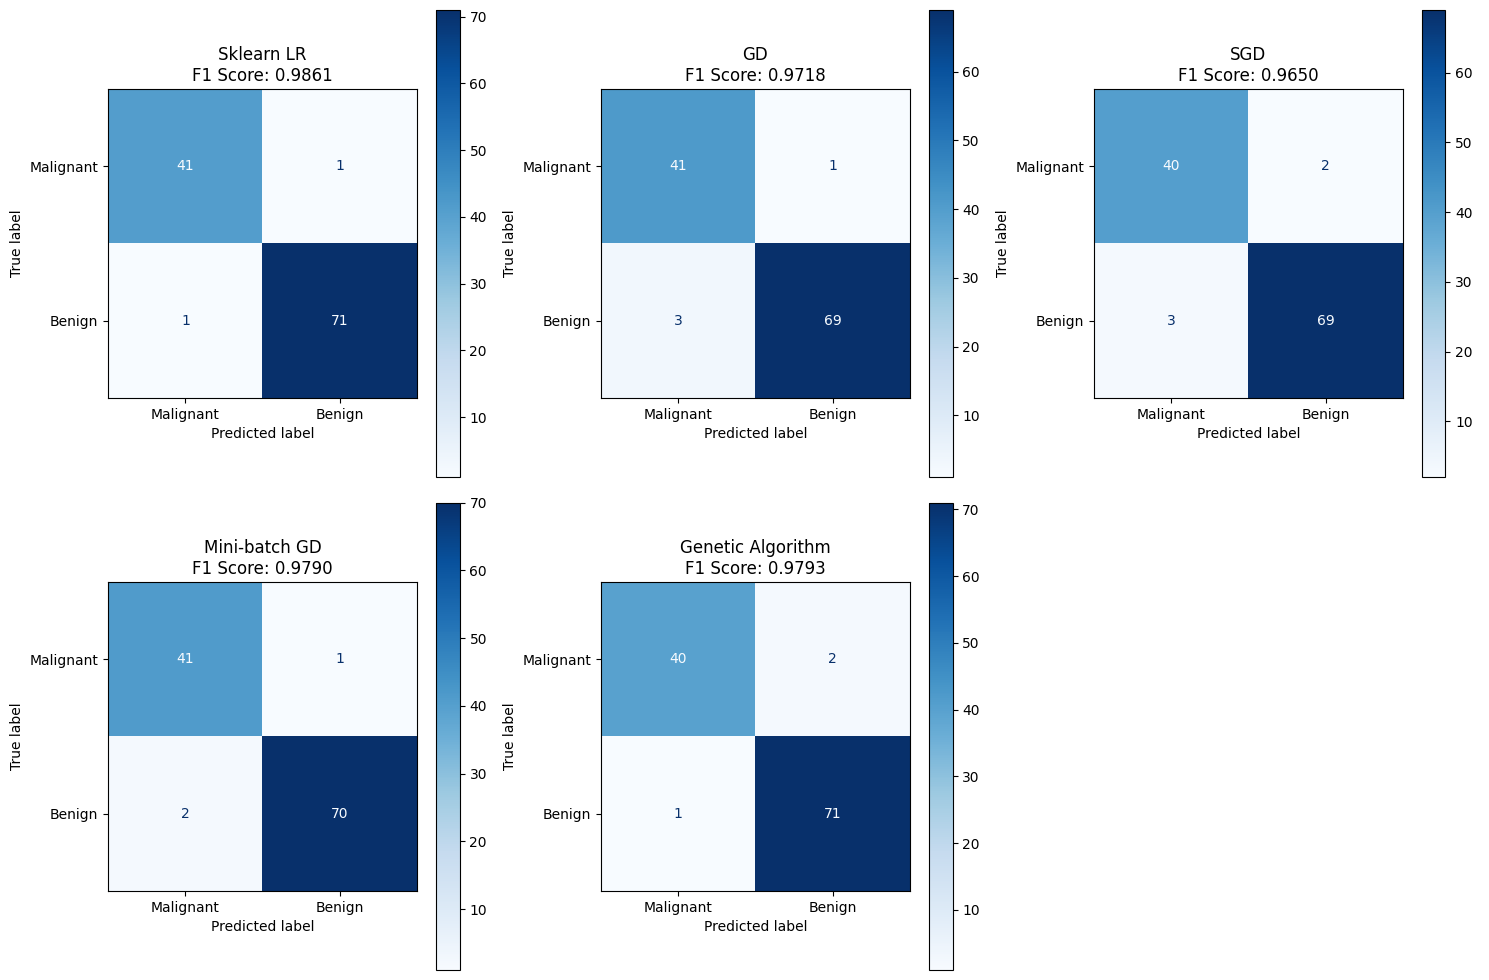


Model Performance Summary:
Model                Accuracy     F1 Score    
------------------------------------------------------------
Sklearn LR           0.9825       0.9861      
GD                   0.9649       0.9718      
SGD                  0.9561       0.9650      
Mini-batch GD        0.9737       0.9790      
Genetic Algorithm    0.9737       0.9793      


In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

# Collect all predictions
models = {
    'Sklearn LR': y_pred_sklearn,
    'GD': gd_results['gd']['predictions'],
    'SGD': gd_results['sgd']['predictions'],
    'Mini-batch GD': gd_results['mini_batch']['predictions'],
    'Genetic Algorithm': y_pred_ga
}

# Create confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

results_summary = []

for idx, (name, predictions) in enumerate(models.items()):
    cm = confusion_matrix(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    accuracy = np.mean(predictions == y_test)

    results_summary.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Confusion Matrix': cm
    })

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
    disp.plot(ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'{name}\nF1 Score: {f1:.4f}')

# Hide the last empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Print summary table
print("\nModel Performance Summary:")
print("="*60)
print(f"{'Model':<20} {'Accuracy':<12} {'F1 Score':<12}")
print("-"*60)
for result in results_summary:
    print(f"{result['Model']:<20} {result['Accuracy']:<12.4f} {result['F1 Score']:<12.4f}")

# Final Conclusions

## 1. Clustering Analysis

### Performance Metrics:
- **Spectral Clustering ARI:** 0.0048
- **K-means ARI:** 0.6536  
- **GMM ARI:** 0.7740

### Interpretation:
GMM achieved the best performance (0.7740), followed by K-means (0.6536), while Spectral Clustering showed virtually no agreement with actual classes (0.0048). The GMM's superior performance suggests the data follows Gaussian distributions. However, even the best clustering method only achieves moderate agreement, indicating that cancer classification involves more complex patterns than simple geometric clustering can capture.

## 2. Dimensionality Reduction

### PCA Results:
- **First Principal Component:** 44.27% variance
- **Second Principal Component:** 18.97% variance
- **Total Variance Captured (2 components):** 63.24%
- **Components for 95% variance:** 10 out of 30

The 2D PCA visualization shows clear but imperfect class separation. Needing only 10 components to capture 95% variance indicates significant redundancy in the original 30 features.

## 3. Classification Performance

### Accuracy Results:
| Method | Accuracy | F1 Score |
|--------|----------|----------|
| Sklearn Logistic Regression | **98.25%** | **0.9861** |
| Mini-batch GD | 97.37% | 0.9790 |
| Genetic Algorithm | 97.37% | 0.9793 |
| Gradient Descent | 96.49% | 0.9718 |
| Stochastic GD | 95.61% | 0.9650 |

## 4. Confusion Matrix Analysis

All models show excellent performance with minimal misclassifications:
- **Sklearn LR:** 1 false positive, 1 false negative
- **Mini-batch GD:** 1 false positive, 2 false negatives
- **Genetic Algorithm:** 2 false positives, 1 false negative
- **Standard GD:** 1 false positive, 3 false negatives
- **SGD:** 2 false positives, 3 false negatives

Models generally have more difficulty identifying malignant cases (false negatives), which is clinically concerning as missing cancer cases has serious consequences.

## 5. Optimization Method Comparison

### Convergence and Stability:
- **Mini-batch GD:** Best balance of speed and accuracy
- **Standard GD:** Stable but slower convergence
- **SGD:** Fastest but most volatile
- **Genetic Algorithm:** No gradient required, good for non-convex problems

### Computational Efficiency:
1. **SGD** - Fastest (single sample updates)
2. **Mini-batch GD** - Fast with stability
3. **Standard GD** - Slower (full dataset each iteration)
4. **Genetic Algorithm** - Slowest (population-based)

## 6. Key Findings

1. **High Linear Separability:** All methods achieved >95% accuracy, confirming the breast cancer dataset is nearly linearly separable.

2. **Sklearn Superiority:** The optimized sklearn implementation outperformed custom implementations by 1-3%, likely due to advanced optimization techniques and regularization.

3. **Clustering vs Classification Gap:** The best clustering (GMM, ARI=0.7740) versus classification (98.25% accuracy) performance gap highlights that supervised learning captures patterns invisible to unsupervised methods.

4. **Feature Redundancy:** PCA analysis reveals significant feature correlation, suggesting potential for feature selection to simplify models.

## 7. Practical Recommendations

### For Different Use Cases:
- **Clinical Deployment:** Use Sklearn Logistic Regression (highest accuracy at 98.25%)
- **Real-time Systems:** Implement Mini-batch GD (97.37% accuracy with fast processing)
- **Research Applications:** Consider Genetic Algorithm for parameter-free optimization
- **Resource-Constrained:** Use PCA with 10 components to reduce dimensionality while maintaining 95% variance

### Future Improvements:
- Ensemble methods could potentially exceed 98.25% accuracy
- Feature engineering focusing on the top 10 PCA components
- Cost-sensitive learning to minimize false negatives
- Cross-validation for more robust performance estimates

## 8. Conclusion

This analysis successfully demonstrated various numerical optimization techniques for breast cancer classification. The high performance across all methods (>95% accuracy) validates the predictive power of the morphological features. The comparison between gradient-based and evolutionary optimization approaches provides insights into their respective strengths, with traditional gradient methods proving most effective for this linearly separable problem.